# Choice of threshold in the POT method

Let us start with a common way of writing the generalized Pareto distribution, which is different from the one in the book, i.e.

$$
    F(x;\xi,\beta) = 
    \begin{cases}
        1 - \left ( 1+ \frac{\xi x}{\beta} \right )^{-1/\xi} & \text{if $\xi \neq 0$} \\
        1-e^{-x/\beta} & \text{if $\xi = 0$}
    \end{cases}
$$

In the above the $\xi$ is our shape parameter and $\beta$ is our scale parameter.

Let us now look at the problem of model validation as well as setting the threshold. Both of these can be based on the so-called mean excess function. (This is a graphical approach)

**Definition** Mean excess function represents the conditional mean of the exceedance size over threshold (given that an exceedance occurred):
$$e(u) = E(X-u \mid X > u)$$

The importance of this function lies in the fact that it is a linear function (in the
variable u) in case of the GPD:
$$e(u) = \frac{\beta + \xi u}{1-\xi}$$

So if we rely in the theoretical results which says that in many cases the excess function will be close to linear for large enough $u$, we can use the empirical excess function to validate this, i.e.
$$
    e^{\text{EMP}}(u) = \frac{\sum_{i=1}^n \text{max}(x_i - u, 0)}{\# \{x_i - u > 0\}}
$$

See also
* http://www.iam.fmph.uniba.sk/institute/jurca/qrm/Chapter4.pdf
* http://www.nematrian.com/Pages/ERMMTGPDMeanExcessLinearInExceedanceThreshold.pdf

In [1]:
import numpy as np
import scipy.stats as ss

Lets use some data, we will see later this data again. It is about breaking strength and we are interested in unusually low breaking strengths, since our analysis has been adapted to the right side of the distribution we flip the values by considering $-x_i$.

In [2]:
x = np.sort(-np.array([0.55,0.74,0.77,0.81,0.84,0.93,1.04,1.11,1.13,1.24,1.25,1.27,1.28,1.29,1.30,1.36,1.39,1.42,1.48,1.48,1.49,1.49,1.50,1.50,1.51,
1.52,1.53,1.54,1.55,1.55,1.58,1.59,1.60,1.61,1.61,1.61,1.61,1.62,1.62,1.63,1.64,1.66,1.66,1.66,1.67,1.68,1.68,1.69,1.70,1.70,1.73,1.76,1.76,1.77,1.78,1.81,1.82,1.84,1.84,1.89,
2.00,2.01,2.24]))

In [3]:
x

array([-2.24, -2.01, -2.  , -1.89, -1.84, -1.84, -1.82, -1.81, -1.78,
       -1.77, -1.76, -1.76, -1.73, -1.7 , -1.7 , -1.69, -1.68, -1.68,
       -1.67, -1.66, -1.66, -1.66, -1.64, -1.63, -1.62, -1.62, -1.61,
       -1.61, -1.61, -1.61, -1.6 , -1.59, -1.58, -1.55, -1.55, -1.54,
       -1.53, -1.52, -1.51, -1.5 , -1.5 , -1.49, -1.49, -1.48, -1.48,
       -1.42, -1.39, -1.36, -1.3 , -1.29, -1.28, -1.27, -1.25, -1.24,
       -1.13, -1.11, -1.04, -0.93, -0.84, -0.81, -0.77, -0.74, -0.55])

In [4]:
maximum = np.maximum((x.reshape(-1,1) - x.reshape(1,-1)),0)
num_max = (x.reshape(-1,1) - x.reshape(1,-1) >= 0)*1
e_EMP = np.sum(maximum,axis=1)/np.sum(num_max,axis=1)

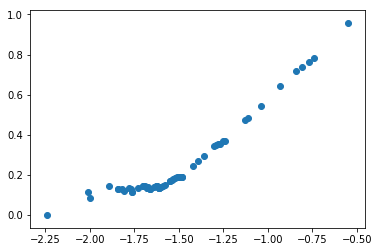

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,e_EMP)

This allows us to set -1.4 as the minimum threshold for this problem, i.e. $u_0 = -1.4$